# Feture request: Unify contrast setup in dabest.load()

## Goal: to plot two experiments ("Light On", "Light Off"), within each experiment compare between "Ctrl" and "Test"

In [20]:
import piplite
await piplite.install('numpy')
await piplite.install('pandas')
await piplite.install('dabest')


import numpy as np
import pandas as pd
import dabest

print('dabest version = ' + dabest.__version__)
import matplotlib.pyplot as plt


def synthesizeData(setNumber, samplesize, genotypeEffect, lightEffect, realEffect):
    data = np.random.rand(samplesize*2, 1)
    dataDf = pd.DataFrame(data, columns = ['Metric'])
    dataDf['Light'] = 'Red Light On'
    dataDf['PairedID'] = dataDf.index
    dataDf.loc[0:samplesize-1, 'Light'] = 'Red Light Off'
    dataDf.loc[samplesize::, 'PairedID'] = dataDf.index[0:samplesize]
    parent1 = 'UAS' + str(setNumber)
    parent2 = 'Gal4' + str(setNumber)
    child = parent2 + '>' + parent1
    dataDf['Genotype'] = parent1
    dataDf.loc[1::3, 'Genotype'] = parent2
    dataDf.loc[2::3, 'Genotype'] = child
    dataDf['Status'] = 'Sibling'
    dataDf.loc[dataDf['Genotype'] == child, 'Status'] = 'Offspring'
    dataDf.loc[dataDf['Genotype'] == child, 'Metric'] = dataDf.loc[dataDf['Genotype'] == child, 'Metric'] + genotypeEffect
    dataDf.loc[dataDf['Light'] == 'Red Light On', 'Metric'] = dataDf.loc[dataDf['Light'] == 'Red Light On', 'Metric'] + lightEffect
    dataDf.loc[(dataDf['Genotype'] == child) & (dataDf['Light'] == 'Red Light On'), 'Metric'] = dataDf.loc[(dataDf['Genotype'] == child) & (dataDf['Light'] == 'Red Light On'), 'Metric'] + realEffect
    return dataDf

dataDf1 = synthesizeData(1, 60, -0.1, 0.05, 0.5)

dabest version = 0.3.9999


In [13]:
dataDf1.head()

,Metric,Light,PairedID,Genotype,Status
0,0.857808,Red Light Off,0,UAS1,Sibling
1,0.327695,Red Light Off,1,Gal41,Sibling
2,0.571104,Red Light Off,2,Gal41>UAS1,Offspring
3,0.686715,Red Light Off,3,UAS1,Sibling
4,0.000830,Red Light Off,4,Gal41,Sibling


## In regular dabest plot, set up a "idx" tuple to set up contrasts

In [14]:
dataDf1['LightStatus'] = dataDf1['Light']+dataDf1['Status']
dataDf1.head()

,Metric,Light,PairedID,Genotype,Status,LightStatus
0,0.857808,Red Light Off,0,UAS1,Sibling,Red Light OffSibling
1,0.327695,Red Light Off,1,Gal41,Sibling,Red Light OffSibling
2,0.571104,Red Light Off,2,Gal41>UAS1,Offspring,Red Light OffOffspring
3,0.686715,Red Light Off,3,UAS1,Sibling,Red Light OffSibling
4,0.000830,Red Light Off,4,Gal41,Sibling,Red Light OffSibling


/Users/xusy/opt/anaconda3/envs/dabestnew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


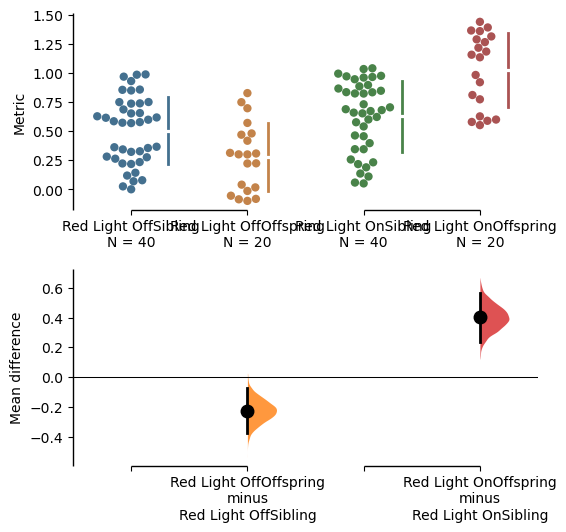

In [15]:
contrast_unpaired = dabest.load(data = dataDf1, x ='LightStatus', y = 'Metric', idx = (('Red Light OffSibling', 'Red Light OffOffspring'),
       ('Red Light OnSibling', 'Red Light OnOffspring')))
f_unpaired = contrast_unpaired.mean_diff.plot()

## For a delta-delta plot, using "x" and "experiment" to setup contrasts

/Users/xusy/opt/anaconda3/envs/dabestnew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


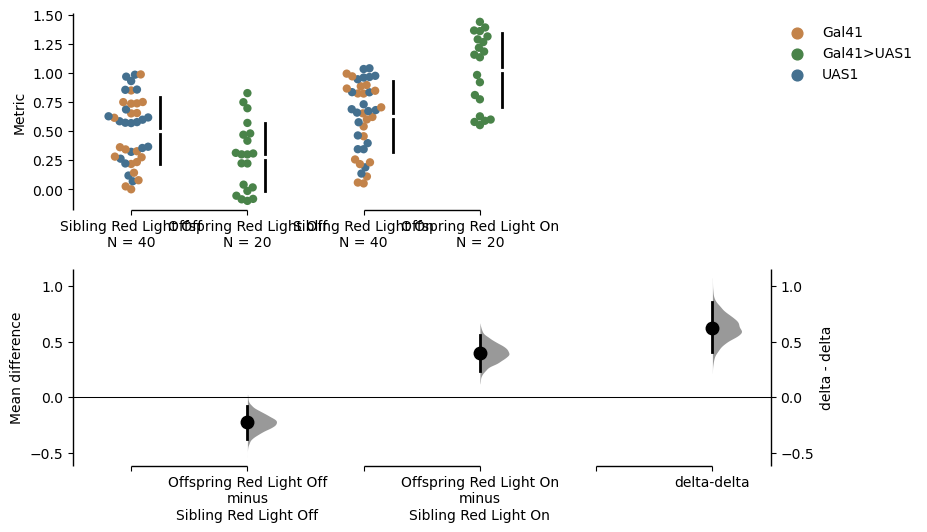

In [16]:
contrast_delta2 = dabest.load(data = dataDf1,
                       x=['Status', 'Genotype'], # the default for this test config is to group flies by genotype
                       y='Metric',
                        delta2 = True, 
                        experiment = 'Light')
f_delta2 = contrast_delta2.mean_diff.plot()

## "x" and "experiment" doesn't work if delta2 is False

In [17]:
contrast_delta2 = dabest.load(data = dataDf1,
                       x=[ 'Status', 'Genotype'], # the default for this test config is to group flies by genotype
                       y='Metric',
                        delta2 = False, 
                        experiment = 'Light')
f_delta2 = contrast_delta2.mean_diff.plot()

IndexError: `idx` is not a column in `data`. Please check.

In [18]:
# to see dabest.load method signature
dabest.load?